# __ANALISI DEL TASSO DI OCCUPAZIONE GIOVANILE IN ITALIA NEGLI ANNI 2010 - 2019__

**Esercizio laboratorio per i punti aggiuntivi all'esame**

Il dataset fa riferimento al tasso di occupazione giovanile italiana negli anni 2010 - 2019 raggruppata per età 15-24 e 25-34 anni ; abbiamo deciso di analizzare tale datasat in quanto ci ha interessato l'argomento e abbiamo deciso di approfondirlo utilizzando le competenze acquisite durante le lezioni e durante i vari esercizi svolti

Il dataset utilizzato si può trovare sul sito ISTAT cliccando il seguente link: http://dati-giovani.istat.it/ PERCORSO DA SEGUIRE PER VISUALIZZARE TABELLA: Lavoro--Occupazione--Tasso di occupazione--Popolazione di 15-34 anni - reg.-- selezionare periodo 2010 - 2019 togliendo i trimestri --selezionare fasce età 15-24 e 25-34)

In [97]:
import numpy as np
import pandas as pd

In [98]:
tabella_iniziale_occ = pd.read_csv("C:/Users/lalla/Desktop/UNIMI/Tasso occupazione.csv")
tabella_iniziale_occ

,ITTER107,Territorio,SEXISTAT1,Sesso,ETA1,Classe di età,TIME,Seleziona periodo,Value,Flag Codes,Flags
0,ITC1,Piemonte,1,maschi,Y15-24,15-24 anni,2010,2010,52.110,NaN,NaN
1,ITC1,Piemonte,1,maschi,Y15-24,15-24 anni,2011,2011,54.017,NaN,NaN
2,ITC1,Piemonte,1,maschi,Y15-24,15-24 anni,2012,2012,52.224,NaN,NaN
3,ITC1,Piemonte,1,maschi,Y15-24,15-24 anni,2013,2013,42.618,NaN,NaN
4,ITC1,Piemonte,1,maschi,Y15-24,15-24 anni,2014,2014,39.999,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1315,ITE2,Umbria,2,femmine,Y25-34,25-34 anni,2015,2015,28.447,NaN,NaN
1316,ITE2,Umbria,2,femmine,Y25-34,25-34 anni,2016,2016,29.167,NaN,NaN
1317,ITE2,Umbria,2,femmine,Y25-34,25-34 anni,2017,2017,26.733,NaN,NaN
1318,ITE2,Umbria,2,femmine,Y25-34,25-34 anni,2018,2018,24.818,NaN,NaN


In [99]:

tabella_iniziale_occ.isnull().sum()

ITTER107                0
Territorio              0
SEXISTAT1               0
Sesso                   0
ETA1                    0
Classe di età           0
TIME                    0
Seleziona periodo       0
Value                   0
Flag Codes           1320
Flags                1320
dtype: int64

 **Tutti i valori di "Flag Codes" e "Flag" sono nulli (1320) pertanto eliminiamo le due colonne perchè non ci interessano per la nostra analisi e creiamo un nuovo dataset con le colonne che ci interessano**

In [59]:
tasso_occupazione_giovanile= pd.DataFrame(data=tabella_iniziale_occ, columns =['Territorio', 'SEXISTAT1', 'Sesso', 'Classe di età', 'Seleziona periodo', 'Value' ])
tasso_occupazione_giovanile

,Territorio,SEXISTAT1,Sesso,Classe di età,Seleziona periodo,Value
0,Piemonte,1,maschi,15-24 anni,2010,52.110
1,Piemonte,1,maschi,15-24 anni,2011,54.017
2,Piemonte,1,maschi,15-24 anni,2012,52.224
3,Piemonte,1,maschi,15-24 anni,2013,42.618
4,Piemonte,1,maschi,15-24 anni,2014,39.999
...,...,...,...,...,...,...
1315,Umbria,2,femmine,25-34 anni,2015,28.447
1316,Umbria,2,femmine,25-34 anni,2016,29.167
1317,Umbria,2,femmine,25-34 anni,2017,26.733
1318,Umbria,2,femmine,25-34 anni,2018,24.818


**La tabella non ci evidenzia la fascia di età 25-34 ma in realtà i valori ci sono (vedi sotto):**

In [67]:
Età= tasso_occupazione_giovanile.groupby(["Classe di età"]).count().reset_index()
Età["Classe di età"]

0    15-24 anni
1    25-34 anni
Name: Classe di età, dtype: object

In [65]:
#rinominiamo "Value" con "Valori" almeno abbiamo tutte le colonne in italiano
tasso_occupazione_giovanile.rename(columns={"Value": "Valori"},inplace=True) 
tasso_occupazione_giovanile

,Territorio,SEXISTAT1,Sesso,Classe di età,Seleziona periodo,Valori
0,Piemonte,1,maschi,15-24 anni,2010,52.110
1,Piemonte,1,maschi,15-24 anni,2011,54.017
2,Piemonte,1,maschi,15-24 anni,2012,52.224
3,Piemonte,1,maschi,15-24 anni,2013,42.618
4,Piemonte,1,maschi,15-24 anni,2014,39.999
...,...,...,...,...,...,...
1315,Umbria,2,femmine,25-34 anni,2015,28.447
1316,Umbria,2,femmine,25-34 anni,2016,29.167
1317,Umbria,2,femmine,25-34 anni,2017,26.733
1318,Umbria,2,femmine,25-34 anni,2018,24.818


Il primo passaggio da fare è verificare se nel dataset sono presenti tutte le regioni utilizzando la funzione "groupby"

In [66]:
Territori=tasso_occupazione_giovanile.groupby(["Territorio"]).count().reset_index()
Territori["Territorio"]

0                                Abruzzo
1                             Basilicata
2                               Calabria
3                               Campania
4                         Emilia-Romagna
5                  Friuli-Venezia Giulia
6                                  Lazio
7                                Liguria
8                              Lombardia
9                                 Marche
10                                Molise
11                              Piemonte
12    Provincia Autonoma Bolzano / Bozen
13             Provincia Autonoma Trento
14                                Puglia
15                              Sardegna
16                               Sicilia
17                               Toscana
18        Trentino Alto Adige / Südtirol
19                                Umbria
20        Valle d'Aosta / Vallée d'Aoste
21                                Veneto
Name: Territorio, dtype: object


Come si può notare, le due Province di Bolzano e Trento rientrano nella regione del Trentino Alto Adige quindi le cancelliamo dal dataset:

In [68]:
#TOG="tasso occupazione giovanile"
TOG_regioni=tasso_occupazione_giovanile[~tasso_occupazione_giovanile.Territorio.str.contains("Provincia")]
TOG_regioni

,Territorio,SEXISTAT1,Sesso,Classe di età,Seleziona periodo,Valori
0,Piemonte,1,maschi,15-24 anni,2010,52.110
1,Piemonte,1,maschi,15-24 anni,2011,54.017
2,Piemonte,1,maschi,15-24 anni,2012,52.224
3,Piemonte,1,maschi,15-24 anni,2013,42.618
4,Piemonte,1,maschi,15-24 anni,2014,39.999
...,...,...,...,...,...,...
1315,Umbria,2,femmine,25-34 anni,2015,28.447
1316,Umbria,2,femmine,25-34 anni,2016,29.167
1317,Umbria,2,femmine,25-34 anni,2017,26.733
1318,Umbria,2,femmine,25-34 anni,2018,24.818


**Il mio dataset adesso è TOG_regioni quindi poi posso creare altri dataset partendo da questo**

In [69]:

primo_data=TOG_regioni[['Territorio', 'Sesso', 'Valori', 'Classe di età']]
primo_data

,Territorio,Sesso,Valori,Classe di età
0,Piemonte,maschi,52.110,15-24 anni
1,Piemonte,maschi,54.017,15-24 anni
2,Piemonte,maschi,52.224,15-24 anni
3,Piemonte,maschi,42.618,15-24 anni
4,Piemonte,maschi,39.999,15-24 anni
...,...,...,...,...
1315,Umbria,femmine,28.447,25-34 anni
1316,Umbria,femmine,29.167,25-34 anni
1317,Umbria,femmine,26.733,25-34 anni
1318,Umbria,femmine,24.818,25-34 anni


In [70]:
#trovo i totali sui 9 anni
primo_data1=primo_data.groupby(["Territorio", "Sesso"]).sum()
primo_data1

Valori
Territorio                     Sesso             
Abruzzo                        femmine    450.670
                               maschi     700.807
                               totale    1151.476
Basilicata                     femmine    155.296
                               maschi     266.817
                               totale     422.114
Calabria                       femmine    467.466
                               maschi     794.076
                               totale    1261.543
Campania                       femmine   1389.723
                               maschi    2440.302
                               totale    3830.025
Emilia-Romagna                 femmine   1945.288
                               maschi    2468.412
                               totale    4413.704
Friuli-Venezia Giulia          femmine    484.171
                               maschi     631.377
                               totale    1115.547
Lazio                          femmine   2248.079
                               maschi    2835.302
                               totale    5083.383
Liguria                        femmine    549.111
                               maschi     688.097
                               totale    1237.208
Lombardia                      femmine   4648.430
                               maschi    5901.534
                               totale   10549.964
Marche                         femmine    644.267
                               maschi     850.983
                               totale    1495.252
Molise                         femmine     91.359
                               maschi     140.499
                               totale     231.859
Piemonte                       femmine   1835.240
                               maschi    2318.215
                               totale    4153.452
Puglia                         femmine   1156.132
                               maschi    1883.152
                               totale    3039.285
Sardegna                       femmine    533.970
                               maschi     699.594
                               totale    1233.564
Sicilia                        femmine   1159.338
                               maschi    2082.892
                               totale    3242.232
Toscana                        femmine   1524.453
                               maschi    1926.715
                               totale    3451.166
Trentino Alto Adige / Südtirol femmine    566.733
                               maschi     718.005
                               totale    1284.735
Umbria                         femmine    356.386
                               maschi     478.768
                               totale     835.154
Valle d'Aosta / Vallée d'Aoste femmine     57.570
                               maschi      70.771
                               totale     128.339
Veneto                         femmine   2208.382
                               maschi    2905.994
                               totale    5114.380

In [74]:
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt

In [103]:
sns.set_theme(style="darkgrid")

AttributeError: module 'seaborn' has no attribute 'set_theme'

In [95]:
sns.set_style=("darkgrid")

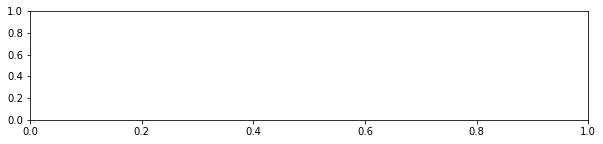

In [96]:
fig = plt.figure(figsize=(10,2))  # larghezza 10 pollici, altezza 2 pollici
ax = fig.add_subplot(111)

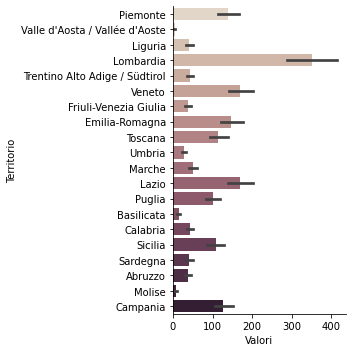

In [79]:
sns.catplot(data=primo_data, x="Valori", y="Territorio", kind="bar", palette="ch:.25")

In [85]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [90]:
img = mpimg.imread("C:/Users/lalla/Desktop/UNIMI/OIP.jpg")
print(img)

[[[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 ...

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]]


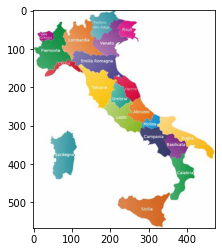

In [91]:
imgplot = plt.imshow(img)

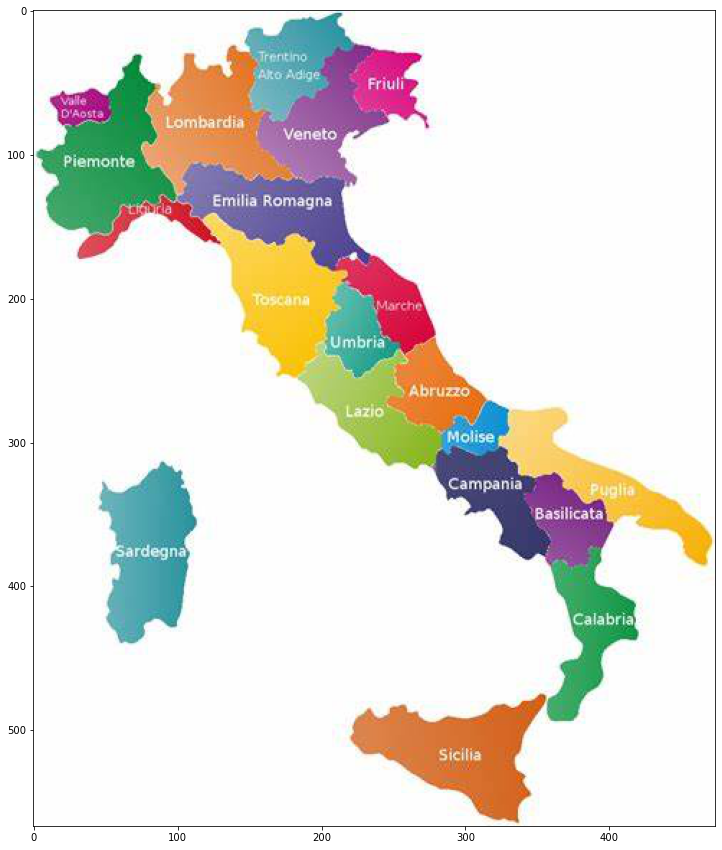

In [92]:
plt.figure(figsize=(15,15))
plt.imshow(img); plt.show()

tasso di imprenditorialita' giovanile anni 2000-2014
http://www.datiopen.it/it/opendata/Imprenditorialit_giovanile_per_regione

In [102]:
prova1 = pd.read_csv("C:/Users/lalla/Desktop/UNIMI/Imprenditorialità giovanile.csv")
prova1

,Anno;Regione;Percentuale giovani titolari imprese individuali
0,2000;Piemonte;9.27
1,2000;Valle d'Aosta;7.69
2,2000;Lombardia;9.77
3,2000;Trentino-Alto Adige;6.74
4,2000;Veneto;7.71
...,...
295,2014;Puglia;6.66
296,2014;Basilicata;5.56
297,2014;Calabria;8.49
298,2014;Sicilia;8.22


tasso di imprenditorialita' femminile anni 2000-2014

In [104]:
prova2 = pd.read_csv("C:/Users/lalla/Desktop/UNIMI/Imprenditorialità femminile.csv")
prova2

,"Anno;""Regione"";""Percentuale titolari donne di imprese individuali "";"
0,"2000;""Piemonte"";26.28;"
1,"2000;""Valle d'Aosta"";32.41;"
2,"2000;""Lombardia"";22.38;"
3,"2000;""Trentino-Alto Adige"";20.66;"
4,"2000;""Veneto"";22.58;"
...,...
295,"2014;""Puglia"";25.71;"
296,"2014;""Basilicata"";31.34;"
297,"2014;""Calabria"";26.53;"
298,"2014;""Sicilia"";27.21;"


In [105]:
prova3 = pd.read_csv("C:/Users/lalla/Desktop/UNIMI/Tasso scolarità.csv")
prova3

,ITTER107,Territorio,TIPO_DATO_FOL,Tipo dato,SEXISTAT1,Sesso,ETA1,Classe di età,TITOLO_STUDIO,Titolo di studio,CITTADINANZA,Cittadinanza,TIME,Seleziona periodo,Value,Flag Codes,Flags
0,IT,Italia,POP_15,popolazione 15 anni e oltre (migliaia),1,maschi,Y15-24,15-24 anni,3,"licenza di scuola elementare, nessun titolo di...",TOTAL,totale,2010,2010,57.725,NaN,NaN
1,IT,Italia,POP_15,popolazione 15 anni e oltre (migliaia),1,maschi,Y15-24,15-24 anni,3,"licenza di scuola elementare, nessun titolo di...",TOTAL,totale,2010-Q2,T2-2010,70.229,NaN,NaN
2,IT,Italia,POP_15,popolazione 15 anni e oltre (migliaia),1,maschi,Y15-24,15-24 anni,3,"licenza di scuola elementare, nessun titolo di...",TOTAL,totale,2010-Q1,T1-2010,75.314,NaN,NaN
3,IT,Italia,POP_15,popolazione 15 anni e oltre (migliaia),1,maschi,Y15-24,15-24 anni,3,"licenza di scuola elementare, nessun titolo di...",TOTAL,totale,2010-Q4,T4-2010,44.196,NaN,NaN
4,IT,Italia,POP_15,popolazione 15 anni e oltre (migliaia),1,maschi,Y15-24,15-24 anni,3,"licenza di scuola elementare, nessun titolo di...",TOTAL,totale,2010-Q3,T3-2010,41.161,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303,IT,Italia,POP_15,popolazione 15 anni e oltre (migliaia),9,totale,Y25-34,25-34 anni,99,totale,TOTAL,totale,2019-Q2,T2-2019,6542.816,NaN,NaN
1304,IT,Italia,POP_15,popolazione 15 anni e oltre (migliaia),9,totale,Y25-34,25-34 anni,99,totale,TOTAL,totale,2019-Q4,T4-2019,6507.638,NaN,NaN
1305,IT,Italia,POP_15,popolazione 15 anni e oltre (migliaia),9,totale,Y25-34,25-34 anni,99,totale,TOTAL,totale,2019-Q3,T3-2019,6519.996,NaN,NaN
1306,IT,Italia,POP_15,popolazione 15 anni e oltre (migliaia),9,totale,Y25-34,25-34 anni,99,totale,TOTAL,totale,2020-Q2,T2-2020,6472.912,NaN,NaN


In [108]:
prova3.isnull().sum()

ITTER107                0
Territorio              0
TIPO_DATO_FOL           0
Tipo dato               0
SEXISTAT1               0
Sesso                   0
ETA1                    0
Classe di età           0
TITOLO_STUDIO           0
Titolo di studio        0
CITTADINANZA            0
Cittadinanza            0
TIME                    0
Seleziona periodo       0
Value                   0
Flag Codes           1308
Flags                1308
dtype: int64

**Tutti i valori di "Flag Codes" e "Flag" sono nulli (1320) pertanto eliminiamo le due colonne perchè non ci interessano per la nostra analisi e creiamo un nuovo dataset con le colonne che ci interessano**

In [111]:
#ts = tasso di scolarità
ts= pd.DataFrame(data=prova3, columns =['Territorio', 'Sesso', 'Classe di età', 'Titolo di studio','Seleziona periodo', 'Value' ])
ts

,Territorio,Sesso,Classe di età,Titolo di studio,Seleziona periodo,Value
0,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",2010,57.725
1,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",T2-2010,70.229
2,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",T1-2010,75.314
3,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",T4-2010,44.196
4,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",T3-2010,41.161
...,...,...,...,...,...,...
1303,Italia,totale,25-34 anni,totale,T2-2019,6542.816
1304,Italia,totale,25-34 anni,totale,T4-2019,6507.638
1305,Italia,totale,25-34 anni,totale,T3-2019,6519.996
1306,Italia,totale,25-34 anni,totale,T2-2020,6472.912


In [124]:
ts1=ts.groupby(["Sesso", "Classe di età", "Titolo di studio","Seleziona periodo","Value"]).sum()
ts1

Territorio
Sesso   Classe di età Titolo di studio Seleziona periodo Value              
femmine 15-24 anni    diploma          2010              1294.455     Italia
                                       2011              1305.399     Italia
                                       2012              1318.735     Italia
                                       2013              1328.669     Italia
                                       2014              1311.619     Italia
...                                                                      ...
totale  25-34 anni    totale           T4-2015           6818.239     Italia
                                       T4-2016           6727.322     Italia
                                       T4-2017           6648.365     Italia
                                       T4-2018           6574.566     Italia
                                       T4-2019           6507.638     Italia

[1308 rows x 1 columns]

**La tabella non ci evidenzia il sesso maschile ma in realtà i valori ci sono (vedi sotto):**

In [125]:
ts2=ts1.groupby(["Sesso"]).count().reset_index()
ts2["Sesso"]

0    femmine
1     maschi
2     totale
Name: Sesso, dtype: object

In [126]:
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt

In [127]:
sns.set_theme(style="darkgrid")

AttributeError: module 'seaborn' has no attribute 'set_theme'

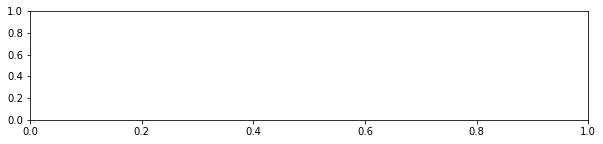

In [128]:
fig = plt.figure(figsize=(10,2))  # larghezza 10 pollici, altezza 2 pollici
ax = fig.add_subplot(111)

In [129]:
sns.catplot(data=ts1, x="Sesso", y="Value", kind="bar", palette="ch:.25")

ValueError: Could not interpret input 'Sesso'